# Call Centre Department - Predictive Analysis

In [99]:
import pandas as pd
import numpy as np

In [100]:
df = pd.read_csv('../../Data/Call Centre Dept/Call_Centre_CLEANED_Final.csv')

In [101]:
df

,Date,Queue,Agent,Event,Wait Time,Talk Time,Country,Description,Team,Calls_Offered,Calls_Answered,Wait_Time_<=20s,Wait_Time_<=30s,Weekday,Inbound_Outbound
0,2021-01-01 00:14:00,CPAC - 0 - Night,Anne Chia - PSCS,COMPLETECALLER,00:00:05,00:02:01,PSCS,CPAC - 0 - Night,HOSP,1,1,1,1,Friday,Inbound
1,2021-01-01 00:14:00,PSCS-Outbound,Anne Chia - PSCS,COMPLETEAGENT,00:00:14,00:00:14,PSCS,PSCS-Outbound,Outbound,1,1,1,1,Friday,Outbound
2,2021-01-01 00:38:00,PEPAC - Press 0 - Night,Anne Chia - PSCS,COMPLETECALLER,00:00:07,00:02:12,PSCS,PEPAC - Press 0 - Night,HOSP,1,1,1,1,Friday,Inbound
3,2021-01-01 00:39:00,PSCS-Outbound,Anne Chia - PSCS,COMPLETEAGENT,00:00:15,00:00:34,PSCS,PSCS-Outbound,Outbound,1,1,1,1,Friday,Outbound
4,2021-01-01 02:06:00,PEPAC - Press 0 - Night,Nurrifah - PSCS,COMPLETECALLER,00:00:06,00:04:11,PSCS,PEPAC - Press 0 - Night,HOSP,1,1,1,1,Friday,Inbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785602,2021-03-31 23:15:00,MEH Internal - Night,Radhiah Binte Abdul Rashid - PSCS,COMPLETEAGENT,00:00:02,00:01:13,PSCS,MEH Internal - Night,HOSP,1,1,1,1,Wednesday,Inbound
785603,2021-03-31 23:16:00,PSCS-Outbound,Radhiah Binte Abdul Rashid - PSCS,COMPLETEAGENT,00:00:16,00:00:11,PSCS,PSCS-Outbound,Outbound,1,1,1,1,Wednesday,Outbound
785604,2021-03-31 23:17:00,PEH Internal - Night,Norzihan - PSCS,COMPLETECALLER,00:00:05,00:01:43,PSCS,PEH Internal - Night,HOSP,1,1,1,1,Wednesday,Inbound
785605,2021-03-31 23:19:00,PSCS-Outbound,Norzihan - PSCS,COMPLETECALLER,00:01:00,00:01:20,PSCS,PSCS-Outbound,Outbound,1,1,0,0,Wednesday,Outbound


## Forecasting with Time Series Model for Calls Offered

### Disect data of Date and Calls Offered ONLY

In [102]:
call_off_df = df[['Date', 'Calls_Offered']]
call_off_df

,Date,Calls_Offered
0,2021-01-01 00:14:00,1
1,2021-01-01 00:14:00,1
2,2021-01-01 00:38:00,1
3,2021-01-01 00:39:00,1
4,2021-01-01 02:06:00,1
...,...,...
785602,2021-03-31 23:15:00,1
785603,2021-03-31 23:16:00,1
785604,2021-03-31 23:17:00,1
785605,2021-03-31 23:19:00,1


In [103]:
#Check for null values
call_off_df.isnull().sum()

Date             0
Calls_Offered    0
dtype: int64

In [104]:
#Check info
call_off_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785607 entries, 0 to 785606
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Date           785607 non-null  object
 1   Calls_Offered  785607 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 12.0+ MB


In [105]:
#test to fix SARIMA
call_off_df = call_off_df.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [106]:
#Change 'Date' column to datetime
call_off_df['Date'] = pd.to_datetime(call_off_df['Date'], infer_datetime_format=True)
#Set as index
call_off_df = call_off_df.set_index('Date')

In [107]:
#Select the proper time period for weekly aggregation
call_off_df = call_off_df['2021-01-01':'2021-12-31'].resample('W').sum()
call_off_df.head()

/var/folders/nf/8wr53kjs7fd1dn_ddxwgy9xh0000gn/T/ipykernel_4005/2934494826.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  call_off_df = call_off_df['2021-01-01':'2021-12-31'].resample('W').sum()


,Calls_Offered
Date,
2021-01-03,5292
2021-01-10,17792
2021-01-17,14886
2021-01-24,14984
2021-01-31,14512


In [139]:
call_off_df.loc['2021-06-25':'2021-07-15']

,Calls_Offered
Date,
2021-06-27,13353
2021-07-04,13440
2021-07-11,13616


In [108]:
#Groupby Date to show Year/Month --> Summarize Calls_Offered
#call_off_df_mth = call_off_df.groupby(call_off_df.Date.dt.to_period('M')).agg('sum')
#call_off_df_mth

In [109]:
#Alternative to find Date and Time

#Normalize Day of Month
#call_off_df['Year_Month'] = call_off_df['Date'] + pd.offsets.MonthEnd(-1) + pd.offsets.Day(1)

#Groupby by Month -> Summarize Calls Offered
#call_off_df.groupby('Year_Month')['Calls_Offered'].sum()

### Check for Common Time Series Patterns

In [110]:
import warnings
import matplotlib.pyplot as plt

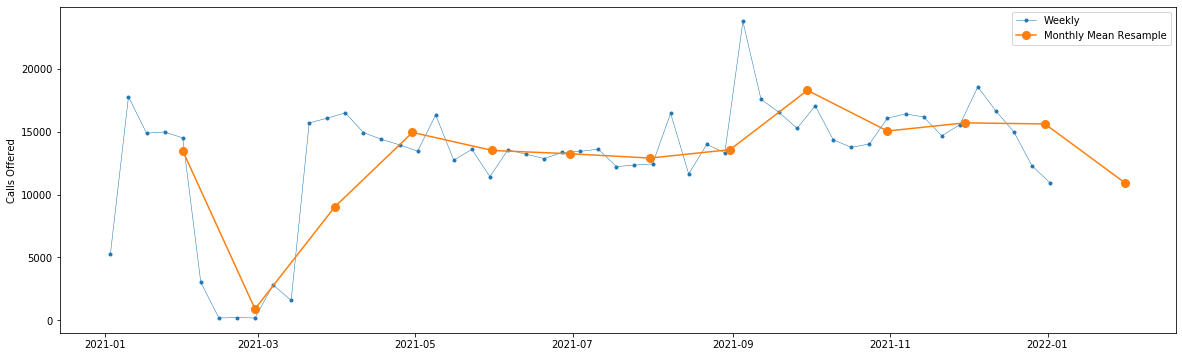

In [111]:
#Visualize the Data
y = call_off_df['Calls_Offered']
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(y, marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(), marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Calls Offered')
ax.legend()

### Decompose Data

In [112]:
import statsmodels.api as sm

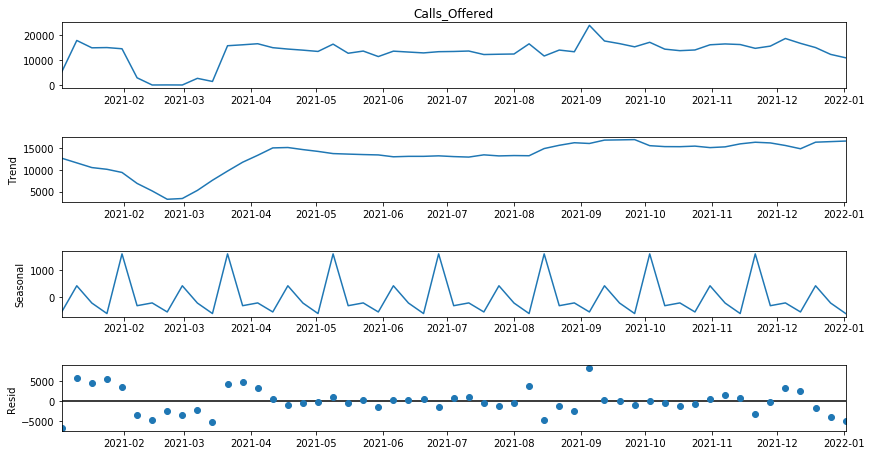

In [113]:
#graphs to show seasonal_decompose 
#max period is round down(53/2) 
def seasonal_decompose(y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq', period=7)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

seasonal_decompose(y)

### Check for Stationarity

In [114]:
#plot for Rolling Statistic to test Stationarity
def test_stationarity(timeseries, title):

    #Determine rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean')
    ax.plot(rolstd, label='rolling std (x10)')
    ax.legend()

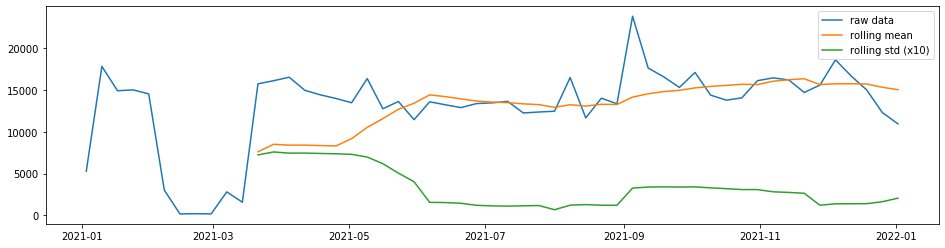

In [115]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y, 'raw data')

Based on the above, it does not seems like it is stationary. However, let's look at performing another test of stationarity to further evaluate it. 

### Augmented Dickey-Fuller Test

In [116]:
from statsmodels.tsa.stattools import adfuller

In [117]:
#Augmented Dickey-Fuller Test
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [118]:
ADF_test(y, 'raw data')

 > Is the raw data stationary ?
Test statistic = -3.328
P-value = 0.014
Critical values :
	1%: -3.562878534649522 - The data is not stationary with 99% confidence
	5%: -2.918973284023669 - The data is  stationary with 95% confidence
	10%: -2.597393446745562 - The data is  stationary with 90% confidence


As based on the 1%: Data is not stationary within 99 percent of the confidence interval. Hence, there is a need to stationarize the data. 

### Make the Data Stationary

#### Detrending

 > Is the de-trended data stationary ?
Test statistic = -1.861
P-value = 0.350
Critical values :
	1%: -3.6155091011809297 - The data is not stationary with 99% confidence
	5%: -2.941262357486514 - The data is not stationary with 95% confidence
	10%: -2.6091995013850418 - The data is not stationary with 90% confidence


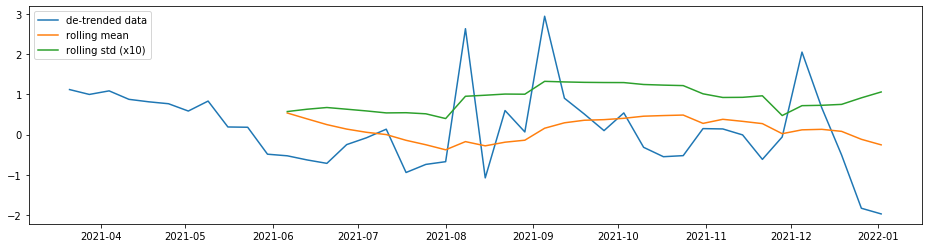

In [119]:
#detrend
y_detrend = (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

#### Differencing

 > Is the 12 lag differenced data stationary ?
Test statistic = -3.746
P-value = 0.004
Critical values :
	1%: -3.6699197407407405 - The data is  stationary with 99% confidence
	5%: -2.9640707407407407 - The data is  stationary with 95% confidence
	10%: -2.621171111111111 - The data is  stationary with 90% confidence


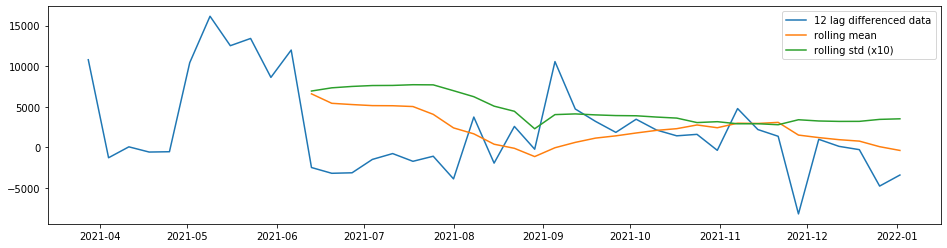

In [120]:
#differencing
y_12lag = y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

As the differencing provides the best results, this will be the transformation that will be used. 

#### Combining Detrending and Differencing

In [121]:
#detrend + differencing
#y_12lag_detrend = y_detrend - y_detrend.shift(12)
#
#test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
#ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

### Create Training & Testing Datasets

In [122]:
#set y_to_train, y_to_test, and the length of predict units
y_to_train = y[:'2021-06-30'] #dataset to train
y_to_test = y['2021-07-01':] #last X months for test

predict_date = len(y) - len(y[:'2021-06-30']) # the number of data points for the test set

### Simple Exponential Smoothing (SES)

Suitable for time series data without trend or seasonal components

In [123]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing

In [124]:
def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 3095.27
The Root Mean Squared Error of our forecasts with auto optimization is 3067.92


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


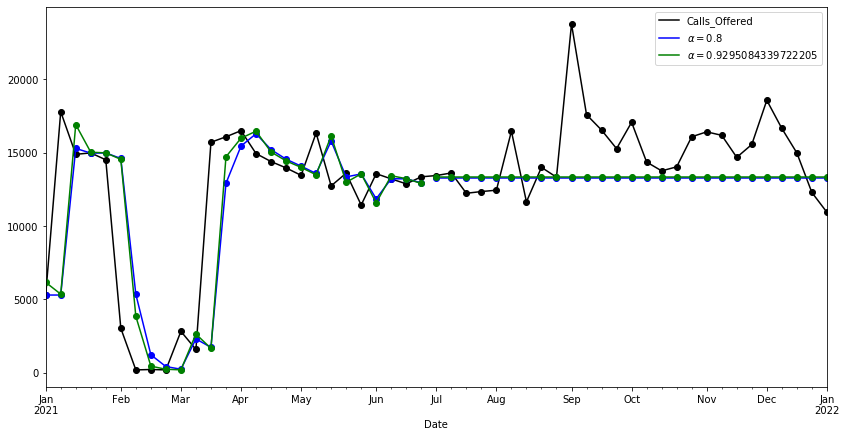

In [125]:
ses(y, y_to_train,y_to_test,0.8,predict_date)

Based on the visualization results from SES, it is not ideal. 

### Holt's Linear Trend Method

Suitable for time series data with a trend component but without a seasonal component.

In [126]:
from statsmodels.tsa.api import Holt

In [127]:
#holt's linear trend
def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit3 = Holt(y_to_train, damped_trend=True).fit(smoothing_level, smoothing_slope)
    fcast3 = fit3.forecast(predict_date).rename("Additive damped trend")
    mse3 = ((fcast3 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Additive damped trend {}'.format(round(np.sqrt(mse2), 2)))

    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)
    fit3.fittedvalues.plot(marker="o", color='green')
    fcast3.plot(color='green', marker="o", legend=True)

    plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


The Root Mean Squared Error of Holts Linear trend 3059.08
The Root Mean Squared Error of Holts Exponential trend 2670.5
The Root Mean Squared Error of Holts Additive damped trend 2670.5


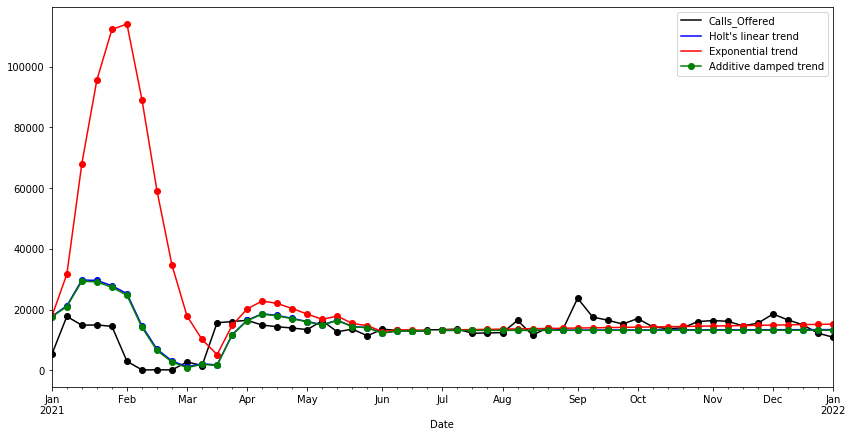

In [128]:
holt(y, y_to_train,y_to_test,0.6,0.2,predict_date)

### SARIMA

Suitable for time series data with trend and/or seasonal components.

In [129]:
import itertools

In [130]:
#sarima 
def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [134]:
sarima_grid_search(y,12)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07621D+01    |proj g|=  1.15890D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.159D-06   1.076D+01
  F =   10.762080403403337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.7

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      6      1     0     0   4.491D-06   7.598D+00
  F =   7.5983722906548294     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.12620D+01    |proj g|=  1.78879D-04
  ys=-3.474E+01  -gs= 5.205E-01 BFGS update SKIPPED


 This problem is unconstrained.


  ys=-1.042E+02  -gs= 5.257E-01 BFGS update SKIPPED
  ys=-1.684E+01  -gs= 5.127E-01 BFGS update SKIPPED

At iterate    5    f=  1.02289D+01    |proj g|=  5.76177D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     96      5     3     0   5.762D+04   1.023D+01
  F =   10.228924107288087     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.81169D+00    |proj g|=  2.05684D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-3.306E+01  -gs= 5.201E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  1.04257D+01    |proj g|=  8.13553D+04
  ys=-1.275E+00  -gs= 4.654E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6    127      3     3     0   8.136D+04   1.043D+01
  F =   10.425731434460243     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02538D+01    |proj g|=  5.10213D-01

At iterate    5    f=  1.02347D+01    |proj g|=  2.59948D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   4.941D-05   7.953D+00
  F =   7.9532515923677725     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34417D+00    |proj g|=  3.46360D-01

At iterate    5    f=  7.31852D+00    |proj g|=  1.72275D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-9.844E+01  -gs= 5.068E-01 BFGS update SKIPPED
  ys=-1.903E+01  -gs= 4.965E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  1.00339D+01    |proj g|=  3.12442D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6    120      3     2     0   3.124D+04   1.003D+01
  F =   10.033860337719400     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.18050D+00    |proj g|=  2.81700D-01

At iterate    5    f=  8.12324D+00    |proj g|=  6.28683D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    0    f=  7.77639D+00    |proj g|=  2.66926D-01

At iterate    5    f=  7.72417D+00    |proj g|=  1.63928D-02

At iterate   10    f=  7.72385D+00    |proj g|=  9.01665D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   4.750D-05   7.724D+00
  F =   7.7238529345250262     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33627D+00    |proj g|=  2.98023D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-9.844E+01  -gs= 5.068E-01 BFGS update SKIPPED
  ys=-1.904E+01  -gs= 4.965E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  8.16028D+00    |proj g|=  2.77437D+05
  ys=-1.144E+00  -gs= 2.845E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6    125      3     3     0   2.774D+05   8.160D+00
  F =   8.1602754422817956     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.23142D+00    |proj g|=  4.15708D-05


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      7      1     0     0   1.922D-06   9.224D+00
  F =   9.2238970534530331     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46185D+00    |proj g|=  4.34564D+00

At iterate    5    f=  7.12368D+00    |proj g|=  5.79437D-03

At iterate   10    f=  7.12210D+00    |proj g|=  1.17248D-01

At iterate   15    f=  6.99826D+00    |proj g|=  6.60987D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.35706D+00    |proj g|=  6.23774D+00

At iterate    5    f=  7.07411D+00    |proj g|=  1.60548D-01

At iterate   10    f=  6.97715D+00    |proj g|=  2.05910D-02

At iterate   15    f=  6.97681D+00    |proj g|=  1.37778D-03

At iterate   20    f=  6.97666D+00    |proj g|=  2.28619D-02

At iterate   25    f=  6.96817D+00    |proj g|=  1.88628D-01

At iterate   30    f=  6.84833D+00    |proj g|=  3.15552D-02

At iterate   35    f=  6.84482D+00    |proj g|=  1.52188D-02

At iterate   40    f=  6.84444D+00    |proj g|=  7.66611D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10360D+01    |proj g|=  2.47085D-04
  ys=-4.925E+01  -gs= 5.043E-01 BFGS update SKIPPED
  ys=-1.706E+01  -gs= 4.951E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.198E+01  -gs= 5.016E-01 BFGS update SKIPPED

At iterate    5    f=  8.88919D+00    |proj g|=  2.38940D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6    131      4     3     0   2.389D+05   8.889D+00
  F =   8.8891948116475401     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.03793D+00    |proj g|=  9.55970D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08312D+00    |proj g|=  2.90114D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   1.261D-05   7.082D+00
  F =   7.0824663214200578     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.06834D+00    |proj g|=  1.76286D+05
  ys=-1.086E+01  -gs= 4.540E-01 BFGS update SKIPPED
  ys=-6.842E-02  -gs= 4.951E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7    121      3     4     0   4.199D+05   6.619D+00
  F =   6.6188383183760857     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05594D+00    |proj g|=  1.10793D-01

At iterate    5    f=  7.03407D+00    |proj g|=  3.37232D-04

At iterate   10    f=  7.03406D+00    |proj g|=  2.28107D-03

At iterate   15    f=  7.03282D+00    |proj g|=  3.36458D-02

At iter

 This problem is unconstrained.



At iterate   40    f=  6.57848D+00    |proj g|=  4.88822D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     45      1     0     0   1.890D-05   6.578D+00
  F =   6.5784800483032422     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08721D+00    |proj g|=  7.09617D-02

At iterate    5    f=  5.08300D+00    |proj g|=  6.43508D-05

At iterate   10    f=  5.08299D+00    |proj g|=  1.79753D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06843D+01    |proj g|=  9.95577D-05
  ys=-3.302E+01  -gs= 4.835E-01 BFGS update SKIPPED
  ys=-1.045E+02  -gs= 4.883E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     93      3     2     0   1.031D+04   1.047D+01
  F =   10.471087717523963     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.49603D+00    |proj g|=  6.42043D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-3.089E+01  -gs= 5.196E-01 BFGS update SKIPPED
  ys=-7.162E+01  -gs= 5.245E-01 BFGS update SKIPPED
  ys=-1.081E+02  -gs= 5.257E-01 BFGS update SKIPPED
  ys=-1.078E+02  -gs= 5.256E-01 BFGS update SKIPPED

At iterate    5    f=  1.06079D+01    |proj g|=  3.24052D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     73      5     4     0   3.553D-10   1.059D+01
  F =   10.591951942786711     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.04864D+00    |proj g|=  6.69671D-05

At iterate   10    f=  5.04864D+00    |proj g|=  7.13025D-04

At iterate   15    f=  5.04839D+00    |proj g|=  1.20419D-02

At iterate   20    f=  5.00570D+00    |proj g|=  1.72272D-01

At iterate   25    f=  4.97302D+00    |proj g|=  4.90548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     30      1     0     0   3.451D-06   4.973D+00
  F =   4.9730178489231776     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.


  ys=-7.160E+01  -gs= 5.245E-01 BFGS update SKIPPED
  ys=-1.011E+02  -gs= 5.256E-01 BFGS update SKIPPED

At iterate    5    f=  8.52115D+00    |proj g|=  2.82328D+05
  ys=-3.522E-03  -gs= 1.839E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7    110      5     4     0   3.364D+05   7.977D+00
  F =   7.9768360160104672     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.20107D+00    |proj g|=  3.01310D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-5.951E+01  -gs= 5.051E-01 BFGS update SKIPPED
  ys=-3.170E+01  -gs= 5.015E-01 BFGS update SKIPPED
  ys=-1.841E+01  -gs= 4.961E-01 BFGS update SKIPPED

At iterate    5    f=  9.86678D+00    |proj g|=  8.14927D+04
  ys=-2.882E-01  -gs= 2.273E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7    109      4     4     0   1.848D+05   8.705D+00
  F =   8.7054328038144106     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.02343D+00    |proj g|=  9.09423D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   1.197D-04   7.023D+00
  F =   7.0234278223336979     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.96140D+00    |proj g|=  5.01747D-01

At iterate    5    f=  6.87125D+00    |proj g|=  2.86446D-01

At iterate   10    f=  6.84425D+00    |proj g|=  1.83722D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  5.04343D+00    |proj g|=  1.01548D-02

At iterate   20    f=  5.02824D+00    |proj g|=  8.37963D-02

At iterate   25    f=  4.96844D+00    |proj g|=  1.67751D-02

At iterate   30    f=  4.96651D+00    |proj g|=  2.26080D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     36      1     0     0   1.517D-06   4.967D+00
  F =   4.9665143212714389     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


  ys=-3.170E+01  -gs= 5.015E-01 BFGS update SKIPPED
  ys=-1.873E+01  -gs= 4.963E-01 BFGS update SKIPPED

At iterate    5    f=  1.05554D+01    |proj g|=  5.51017D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     76      3     3     0   5.510D+03   1.056D+01
  F =   10.555428369819390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.20753D+00    |proj g|=  6.19327D-06

           * * *

Tit   = t


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02936D+01    |proj g|=  1.01470D+05
  ys=-7.065E+00  -gs= 4.686E-01 BFGS update SKIPPED
  ys=-8.169E-02  -gs= 2.229E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7    103      2     2     0   1.386D+05   9.815D+00
  F =   9.8146450415188280     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86550D+00    |proj g|=  1.05767D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.85193D+00    |proj g|=  6.78899D-04

At iterate   10    f=  6.85167D+00    |proj g|=  1.38131D-02

At iterate   15    f=  6.82539D+00    |proj g|=  1.52366D-01

At iterate   20    f=  6.77557D+00    |proj g|=  2.34136D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   2.303D-06   6.776D+00
  F =   6.7755663149417362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86723D+00    |proj g|=  1.06991D-02

At iterate    5    f=  4.86690D+00    |proj g|=  6.71579D-05

At iterate   10    f=  4.86689D+00    |proj g|=  1.99170D-03

At iterate   15    f=  4.86549D+00    |proj g|=  2.55841D-02

At iterate   20    f=  4.79359D+00    |proj g|=  1.05794D-01

At iterate   25    f=  4.78247D+00    |proj g|=  3.23299D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     31      1     0     0   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     98      2     1     0   6.056D+04   1.054D+01
  F =   10.542168847507934     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.23748D+00    |proj g|=  3.07609D+00

At iterate    5    f=  9.06324D+00    |proj g|=  4.13165D-01

At iterate   10    f=  9.02824D+00    |proj g|=  2.30509D-02

At iterate   15    f=  9.02755D+00    |proj g|=  1.70879D-03

       

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-1.185E+02  -gs= 4.886E-01 BFGS update SKIPPED

At iterate    5    f=  1.06260D+01    |proj g|=  4.45091D+04
  ys=-1.144E+01  -gs= 4.699E-01 BFGS update SKIPPED


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6     79      6     5     0   4.451D+04   1.063D+01
  F =   10.625992276140154     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05247D+00    |proj g|=  2.04621D+00

At iterate    5    f=  6.87258D+00    |proj g|=  1.95613D-01

At iterate   10    f=  6.85375D+00    |proj g|=  3.98284D-02

At iterate   15    f=  6.85090D+00    |proj g|=  1.13600D-04

At iter

 This problem is unconstrained.



At iterate   30    f=  6.57884D+00    |proj g|=  1.35751D-01

At iterate   35    f=  6.56922D+00    |proj g|=  4.11549D-03

At iterate   40    f=  6.56916D+00    |proj g|=  7.61258D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     46      1     0     0   7.613D-07   6.569D+00
  F =   6.5691585481245740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87076D+00    |proj g|=  2.10800D-02


 This problem is unconstrained.



At iterate    5    f=  4.87026D+00    |proj g|=  6.86940D-05

At iterate   10    f=  4.87026D+00    |proj g|=  5.26167D-04

At iterate   15    f=  4.86988D+00    |proj g|=  7.17977D-03

At iterate   20    f=  4.85334D+00    |proj g|=  1.43410D-01

At iterate   25    f=  4.82202D+00    |proj g|=  3.56928D-02

At iterate   30    f=  4.76423D+00    |proj g|=  7.34527D-03

At iterate   35    f=  4.76370D+00    |proj g|=  2.76817D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     54      1     0     0   1.048D-07   4.764D+00
  F =   4.7636996509329101     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


  ys=-3.840E+01  -gs= 4.845E-01 BFGS update SKIPPED
  ys=-1.255E+01  -gs= 4.728E-01 BFGS update SKIPPED
  ys=-1.455E+01  -gs= 4.751E-01 BFGS update SKIPPED
  ys=-3.681E+01  -gs= 4.842E-01 BFGS update SKIPPED

At iterate    5    f=  1.05157D+01    |proj g|=  1.91336D+03
  ys=-1.186E+00  -gs= 4.905E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     78      6     5     0   1.913D+03   1.052D+01
  F =   10.515659952599020     

ABNORMAL_TERMINATION_IN_LNSRCH                              
The set of parameters with the minimum AIC is: SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:512.9419660646736


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [135]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Calls Offered')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Calls Offered')

    plt.legend()
    plt.show()
    
    return (results)

The set of parameters with the minimum AIC is: SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:2.0

test w/ seasonal period 12: The set of parameters with the minimum AIC is: SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:512.9419660646736

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86723D+00    |proj g|=  1.06991D-02

At iterate    5    f=  4.86690D+00    |proj g|=  6.71579D-05

At iterate   10    f=  4.86689D+00    |proj g|=  1.99170D-03

At iterate   15    f=  4.86549D+00    |proj g|=  2.55841D-02

At iterate   20    f=  4.79359D+00    |proj g|=  1.05794D-01

At iterate   25    f=  4.78247D+00    |proj g|=  3.23299D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     31      1     0     0   

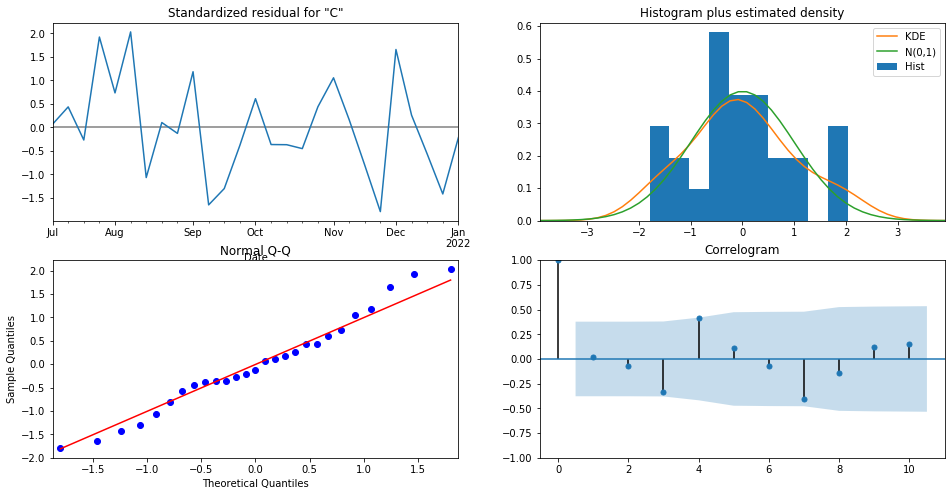

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = False 2889.61


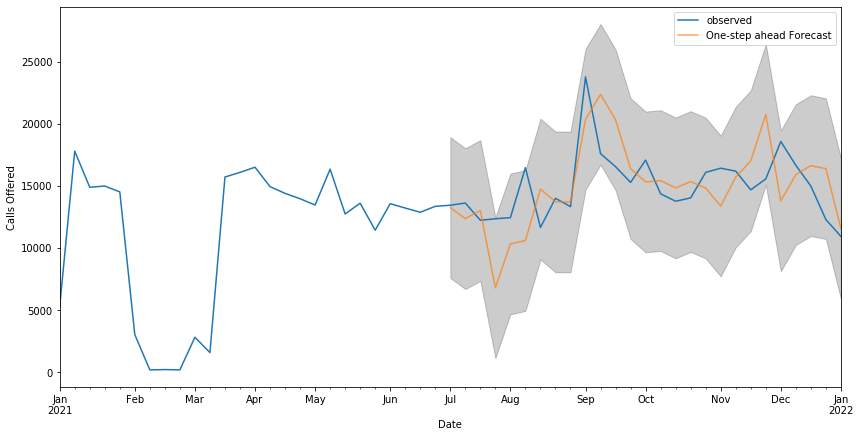

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = True 6732.7


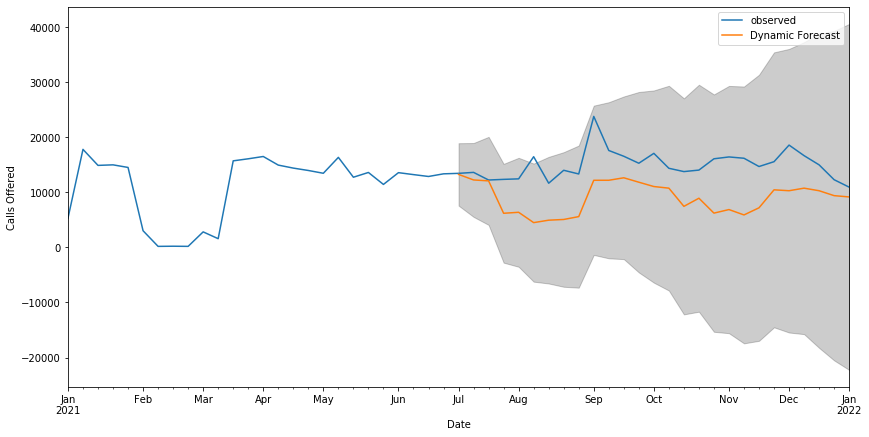

In [142]:
model = sarima_eva(y,(1,1,0),(1,1,0,12),12,'2021-07-04',y_to_test)

#### Making Predictions

In [143]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

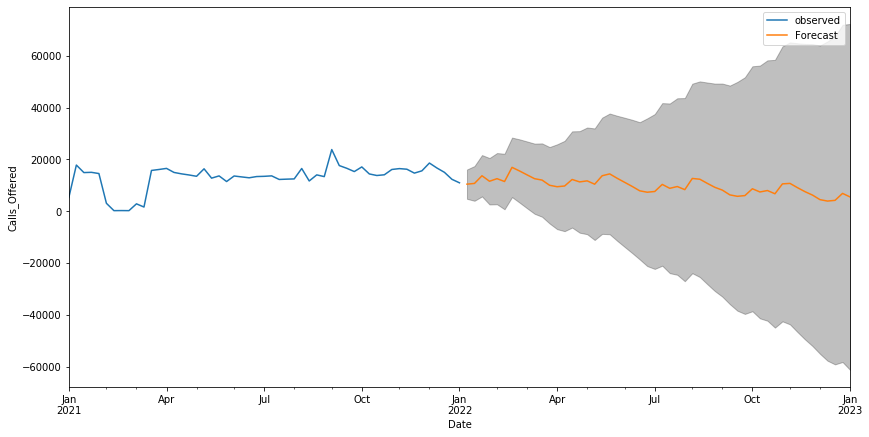

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-01-09,10414.02802951,4750.50816237,16077.54789665
1,2022-01-16,10698.93982966,3995.71061966,17402.16903965
2,2022-01-23,13659.23825395,5669.33051710,21649.14599080
3,2022-01-30,11537.50473805,2571.43542938,20503.57404673
4,2022-02-06,12536.38039047,2647.62679353,22425.13398741


In [146]:
final_table = forecast(model,52,y)
final_table.head()

### ARIMA

DOES NOT WORK - AT THE MOMENT

In [147]:
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

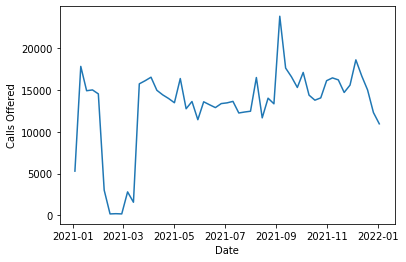

In [148]:
call_off_df.head()

plt.xlabel('Date')
plt.ylabel('Calls Offered')
plt.plot(call_off_df)

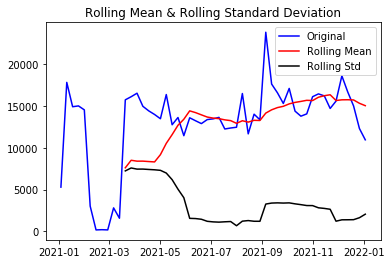

In [149]:
#check for rolling mean and std
rolling_mean = call_off_df.rolling(window = 12).mean()
rolling_std = call_off_df.rolling(window = 12).std()
plt.plot(call_off_df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [151]:
#Check for ADF and p-value
result = adfuller(call_off_df['Calls_Offered'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.3280643019784226
p-value: 0.013669667072560898
Critical Values:
	1%: -3.562878534649522
	5%: -2.918973284023669
	10%: -2.597393446745562


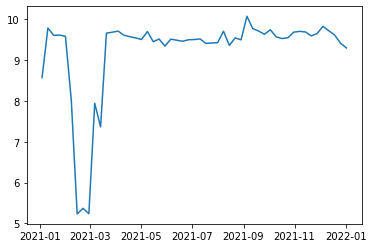

In [152]:
#As p-value is not <0.05 --> take log to lower the rate as rolling mean increases
call_off_df_log = np.log(call_off_df)
plt.plot(call_off_df_log)

In [155]:
#Check for stationarity
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Calls_Offered'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

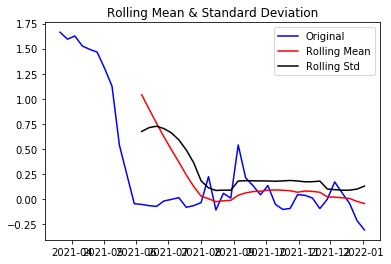

ADF Statistic: -2.9833523078700823
p-value: 0.03647860505922192
Critical Values:
	1%: -3.6209175221605827
	5%: -2.9435394610388332
	10%: -2.6104002410518627


In [156]:
#test with substracting rolling mean
rolling_mean = call_off_df_log.rolling(window=12).mean()
df_log_minus_mean = call_off_df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

As p-value is below the threshold of 0.05 and ADF statistic is close to critical values, time series is stationary.

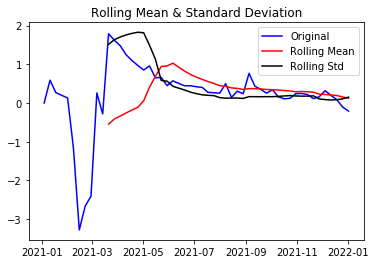

ADF Statistic: -2.618017383402483
p-value: 0.08933032315774381
Critical Values:
	1%: -3.562878534649522
	5%: -2.918973284023669
	10%: -2.597393446745562


In [157]:
#test with applying exponential decay
rolling_mean_exp_decay = call_off_df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = call_off_df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

It performed worse than substracting the rolling mean. 

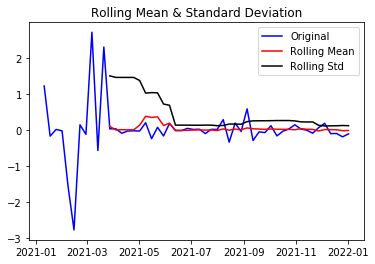

ADF Statistic: -7.152545259379853
p-value: 3.114030240286403e-10
Critical Values:
	1%: -3.5656240522121956
	5%: -2.920142229157715
	10%: -2.598014675124952


In [158]:
#test with time shifting
call_off_df_log_shift = call_off_df_log - call_off_df_log.shift()
call_off_df_log_shift.dropna(inplace=True)
get_stationarity(call_off_df_log_shift)

It performed worse than subtracting the rolling mean. However, it is still more stationary than the original.

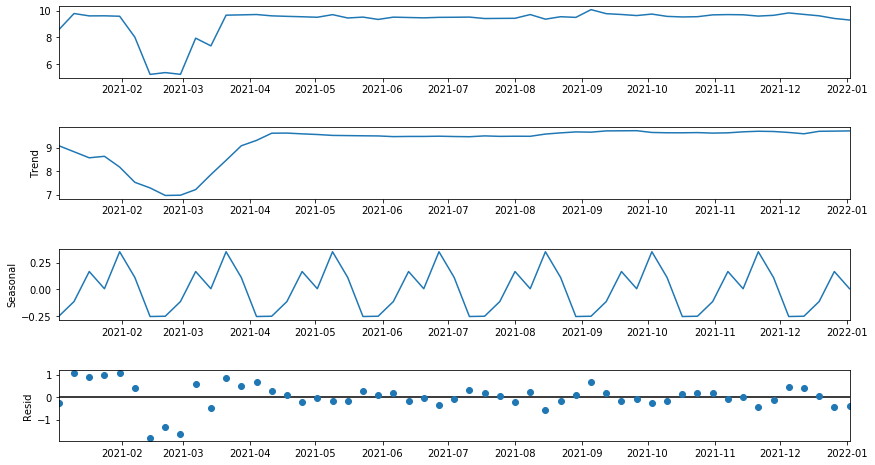

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:218: Runt

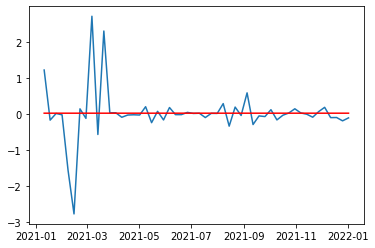

In [189]:
#fit to ARIMA - sample test with order = 1,1,1
decomposition = seasonal_decompose(call_off_df_log) 
model = ARIMA(call_off_df_log, order=(1,1,1))
results = model.fit(disp=-1)
plt.plot(call_off_df_log_shift)
plt.plot(results.fittedvalues, color='red')

TypeError: unhashable type: 'numpy.ndarray'

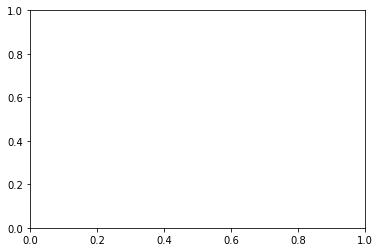

In [190]:
#compare with original time series
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(call_off_df_log['Calls_Offered'].iloc[0], index=call_off_df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

In [169]:
#test with auto arima
import pmdarima as pm
from pmdarima.arima import auto_arima, ADFTest

In [170]:
aft_test = ADFTest(alpha=0.05)
aft_test.should_diff(call_off_df)

(0.031757740520659536, False)

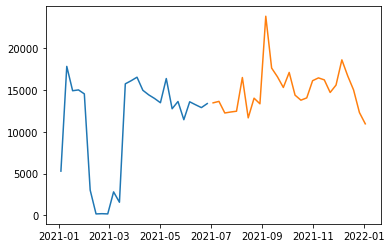

In [171]:
train = y_to_train
test = y_to_test
plt.plot(train)
plt.plot(test)

In [175]:
train = train.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [181]:
arima_model = auto_arima(train.dropna(), start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn', trace=True,
                        suppress_warnings=True, stepwise=True,
                        random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=267.424, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=255.311, Time=0.51 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=269.762, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=256.597, Time=0.54 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=254.521, Time=0.13 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.13 sec


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(0,1,0)(2,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
  warnings.warn(warning_str, ModelFitWarning)


 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=255.986, Time=0.18 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=8.000, Time=0.40 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=255.705, Time=0.74 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=258.905, Time=0.48 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=257.532, Time=0.94 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=259.850, Time=0.35 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=259.268, Time=0.52 sec
 ARIMA(1,1,1)(1,1,0)[12] intercept   : AIC=257.502, Time=0.39 sec

Best model:  ARIMA(1,1,1)(1,1,0)[12]          
Total fit time: 10.546 seconds


In [177]:
arima_model.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3108: RuntimeWarning: invalid value encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   26
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                   0.000
Date:                             Thu, 17 Mar 2022   AIC                              8.000
Time:                                     01:20:13   BIC                             10.260
Sample:                                          0   HQIC                             7.536
                                              - 26                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9997   1.42e-06  -7.04e+05      0.000      -1.000      -1.000
ma.L1         -0.8526    6.1e-07   -1.4e+06      0.000      -0.853      -0.853
ar.S.L12       1.0000         -0       -inf      0.000       1.000       1.000
sigma2      6.527e+06         -0       -inf      0.000    6.53e+06    6.53e+06
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                 4.88
Prob(Q):                               nan   Prob(JB):                         0.09
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         0.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

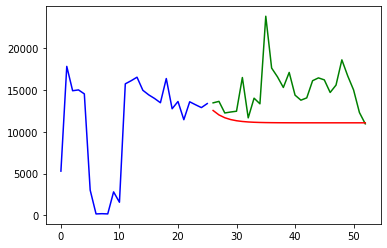

In [188]:
#test with auto_arima
model_test = pm.auto_arima(train, seasonal=True, m=12)
forecasts = model_test.predict(test.shape[0])

x = np.arange(y.shape[0])
plt.plot(x[:26], train, c='blue')
plt.plot(x[26:], test, c='green')
plt.plot(x[26:], forecasts, c='red')
plt.show()

In [182]:
prediction = pd.DataFrame(arima_model.predict(n_periods=20), index=test.index)
prediction.columns = ['predicted_calls_offered']
prediction

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').